In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# specify number of steps
ns = 100
# define time points
t = np.linspace(0,ns/10.0,ns+1)

A first-order linear system with time delay is:                
\begin{equation*}
\tau_p \frac{dy(t)}{dt} = -y(t) + K_p u\left(t-\theta_p\right)
\end{equation*}

In [3]:
class model(object):
    # process model
    Kp = 2.0
    taup = 200.0
    thetap = 0.0

In [4]:
def process(y,t,u,Kp,taup):
    # Kp = process gain
    # taup = process time constant
    dydt = -y/taup + Kp/taup * u
    return dydt

In [5]:
def calc_response(t,m):
    # t = time points
    # m = process model
    Kp = m.Kp
    taup = m.taup
    thetap = m.thetap
    # specify number of steps
    ns = len(t)-1

    delta_t = t[1]-t[0]

    # storage for recording values
    op = np.zeros(ns+1)  # controller output
    pv = np.zeros(ns+1)  # process variable

    # step input
    op[10:]=2.0

    # Simulate time delay
    ndelay = int(np.ceil(thetap / delta_t)) 

    # loop through time steps    
    for i in range(0,ns):
        # implement time delay
        iop = max(0,i-ndelay)
        y = odeint(process,pv[i],[0,delta_t],args=(op[iop],Kp,taup))
        pv[i+1] = y[-1]
    return (pv,op) 

In [6]:
# calculate step response
model.Kp = 2.5
model.taup = 2.0
model.thetap = 3.0
(pv,op) = calc_response(t,model)

In [7]:
pv2 = np.zeros(len(t))
for i in range(len(t)):
    pv2[i] = model.Kp * (1.0 - np.exp(-(t[i]-model.thetap-1.0)/model.taup))*2.0

pv3 = np.zeros(len(t))
for i in range(len(t)):
    pv3[i] = model.Kp * (1.0 - np.exp(-(t[i]-1.0)/model.taup))*2.0

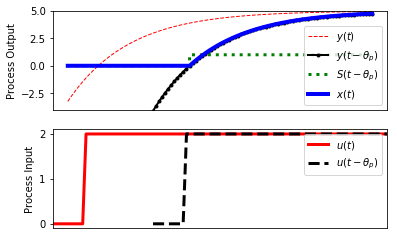

In [8]:
plt.figure(1)

plt.subplot(2,1,1)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.plot(t,pv3,'r--',linewidth=1,label=r'$y(t)$')
plt.plot(t,pv2,'k.-',linewidth=2,label=r'$y(t-\theta_p)$')
plt.plot([0,4,4.0001,10],[0,0,1,1],'g:',linewidth=3,label=r'$S(t- \theta _p)$')
plt.plot(t,pv,'b-',linewidth=4,label=r'$x(t)$')
plt.legend(loc='best')
plt.ylabel('Process Output')
plt.ylim([-4,5])

plt.subplot(2,1,2)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.plot(t,op,'r-',linewidth=3,label=r'$u(t)$')
plt.plot(t+3.0,op,'k--',linewidth=3,label=r'$u(t-\theta_p)$')
plt.ylim([-0.1,2.1])
plt.xlim([0,10])
plt.legend(loc='best')
plt.ylabel('Process Input')

plt.xlabel('Time')

plt.savefig('output.png')
plt.show()